*In this notebook there is some basic text preprocessing and data visualization, followed by machine learning algortihms and deep learning (LSTM Network)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')

Just checking the train and test dataframes

In [3]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


Check how many NaN values there are 

In [5]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

Check tags (words starting with @)

In [7]:
train
train['text'].str.startswith('@').value_counts()

False    6266
True     1347
Name: text, dtype: int64

In [8]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Just see unique keywords

In [9]:
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

Visualizations

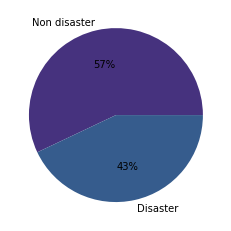

In [10]:
colors = sns.color_palette('viridis')

plt.pie(train['target'].value_counts(), labels=['Non disaster', 'Disaster'], autopct='%.0f%%', colors = colors)
plt.show()

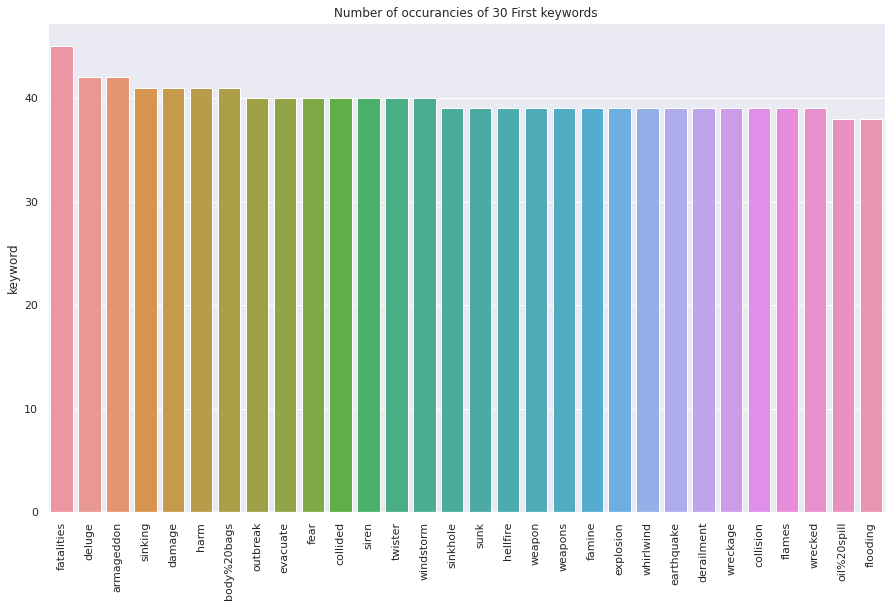

In [11]:
plt.figure(figsize=(15,9))
sns.set(font_scale = 1)
plt.title('Number of occurancies of 30 First keywords')
ax = sns.barplot(x=train["keyword"].value_counts()[:30].index, y=train["keyword"].value_counts()[:30], data=train)
ax.tick_params(axis='x', rotation=90)

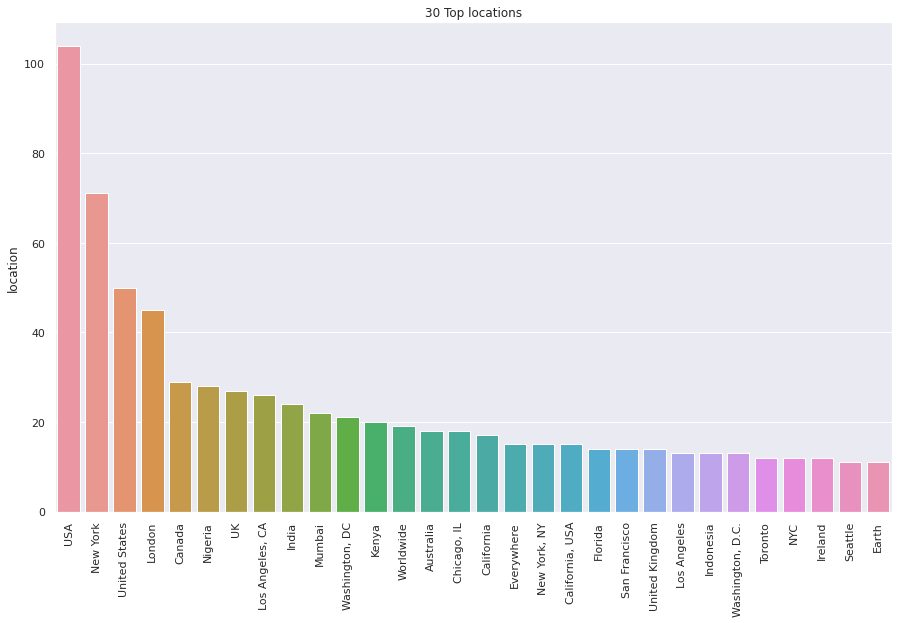

In [12]:
plt.figure(figsize=(15,9))
bx = sns.barplot(x=train['location'].value_counts()[:30].index,y=train['location'].value_counts()[:30])
bx.tick_params(axis='x', rotation=90)

plt.title('30 Top locations')
plt.show()

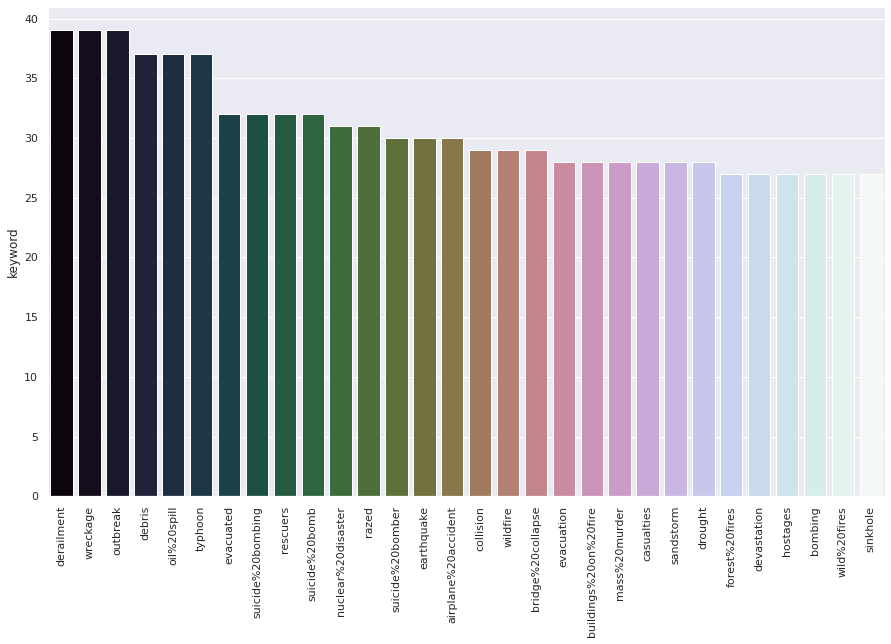

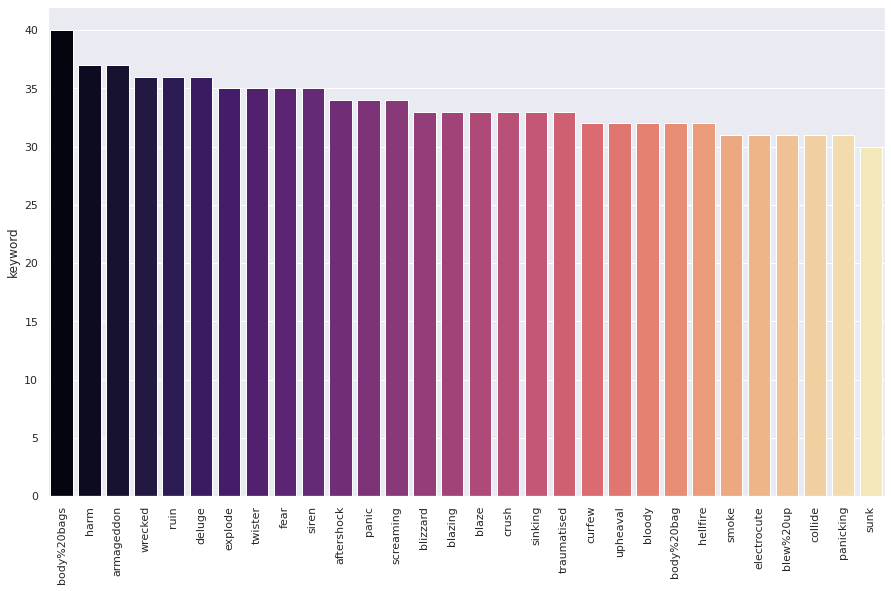

In [13]:
disaster = train.loc[train["target"] == 1]["keyword"].value_counts()
nondisaster = train.loc[train["target"] == 0]["keyword"].value_counts()

plt.figure(figsize=(15,9))
cx = sns.barplot(x=disaster[:30].index, y=disaster[:30], palette = 'cubehelix')
cx.tick_params(axis='x', rotation=90)

plt.figure(figsize=(15,9))
dx = sns.barplot(x=nondisaster[:30].index, y=nondisaster[:30], palette = 'magma')
dx.tick_params(axis='x', rotation=90)


Fill NaN values with empty strings

In [14]:
train.fillna('', inplace=True)
test.fillna('', inplace=True)

TEXT PREPROCESSING (lower, remove digits and specific chars, remove urls)

In [15]:
train['text'] = train['text'].apply(lambda x: x.lower())
test['text'] = test['text'].apply(lambda x: x.lower())

train['location'] = train['location'].apply(lambda x: x.lower())
test['location'] = test['location'].apply(lambda x: x.lower())

In [16]:
train['text']=train['text'].apply(lambda x: re.sub('\w*\d\w*','', x))
test['text']=test['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

train['location']=train['location'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))
test['location']=test['location'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))

In [17]:
train['text']=train['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
test['text']=test['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

train['location']=train['location'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', str(x)))
test['location']=test['location'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', str(x)))

In [18]:
train['text'] = train['text'].str.replace('http\S+|www.\S+', '', case=False)
test['text'] = test['text'].str.replace('http\S+|www.\S+', '', case=False)

train['text'] = train['text'].str.replace('@\S+', '', case=False)
test['text'] = test['text'].str.replace('@\S+', '', case=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Creating a new column 'soup', in which text and location is stored for more information in the final model

In [20]:
def create_soup(x):
    return x['location'] + ' ' + x['text']

In [21]:
df1 = train
features=['location','text']
df1 = df1[features]

In [22]:
df2 = test
df2 = df2[features]

In [23]:
df1['soup'] = df1.apply(create_soup, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df2['soup'] = df2.apply(create_soup, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
y = train['target']

X = df1['soup']
#X = train['text']

In [26]:
#X_te = test['text']
X_te = df2['soup']

In [27]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [28]:
X

0        our deeds are the reason of this earthquake m...
1                   forest fire near la ronge sask canada
2        all residents asked to shelter in place are b...
3         people receive wildfires evacuation orders i...
4        just got sent this photo from ruby alaska as ...
                              ...                        
7608     two giant cranes holding a bridge collapse in...
7609     ariaahrary thetawniest the out of control wil...
7610                             utc s of volcano hawaii 
7611     police investigating after an ebike collided ...
7612     the latest more homes razed by northern calif...
Name: soup, Length: 7613, dtype: object

Split train dataframe in train and validation set with observations and labels (80-20%)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(len(X_train))

6090


Tfidf vectorizer used on train and validation sets (used for ml models)

In [31]:
tfidf =  TfidfVectorizer(stop_words='english')
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [32]:
X_te = tfidf.transform(X_te)

In [33]:
print(X_train[0])

  (0, 13314)	0.34451765198580475
  (0, 11246)	0.34451765198580475
  (0, 8748)	0.23995585061224206
  (0, 7092)	0.2890852752241377
  (0, 1549)	0.2152780352799539
  (0, 819)	0.23535468752506766
  (0, 14504)	0.25520521659907336
  (0, 9275)	0.22608586644005071
  (0, 463)	0.3240917747477013
  (0, 6348)	0.34451765198580475
  (0, 2989)	0.3607305828515159
  (0, 13646)	0.22277935486765124


Alternatively, use count vectorizer to trasnform text 

In [34]:
""""countv = CountVectorizer(stop_words='english')
X_train = countv.fit_transform(X_train)
X_test = countv.transform(X_test)"""

'"countv = CountVectorizer(stop_words=\'english\')\nX_train = countv.fit_transform(X_train)\nX_test = countv.transform(X_test)'

In [35]:
""""X_te = countv.transform(X_te)"""

'"X_te = countv.transform(X_te)'

In [36]:
print(X_train)

  (0, 13314)	0.34451765198580475
  (0, 11246)	0.34451765198580475
  (0, 8748)	0.23995585061224206
  (0, 7092)	0.2890852752241377
  (0, 1549)	0.2152780352799539
  (0, 819)	0.23535468752506766
  (0, 14504)	0.25520521659907336
  (0, 9275)	0.22608586644005071
  (0, 463)	0.3240917747477013
  (0, 6348)	0.34451765198580475
  (0, 2989)	0.3607305828515159
  (0, 13646)	0.22277935486765124
  (1, 1627)	0.39702743481434616
  (1, 5004)	0.2528022115732142
  (1, 4400)	0.27500742654459487
  (1, 2113)	0.37918315252047363
  (1, 5639)	0.3665224327469083
  (1, 12229)	0.33083386815916344
  (1, 15151)	0.39702743481434616
  (1, 15474)	0.39702743481434616
  (2, 11720)	0.18514058211273088
  (2, 447)	0.14915318741711092
  (2, 12387)	0.2470547549601494
  (2, 7540)	0.26844562868334204
  (2, 15251)	0.22179896794570508
  :	:
  (6087, 1634)	0.3203639138857168
  (6087, 12935)	0.28919929380345394
  (6087, 1478)	0.2423362509070157
  (6087, 7704)	0.27966710568933306
  (6088, 13403)	0.3913268384909368
  (6088, 3626)	0.391

Multinomial Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)



MultinomialNB()

In [38]:
preds = nb.predict(X_test)

In [39]:
from sklearn.metrics import f1_score

f1_score(y_test, preds, average='micro')
#model.score(X_test, y_test)

0.7892317793827971

In [40]:
final_preds = nb.predict(X_te)

In [41]:
submission_file1=pd.DataFrame({'id':test['id'],'target':final_preds})
submission_file1

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [42]:
submission_file1.to_csv('submission_1.csv', index = False)

Linear Support Vector classifier

In [43]:
from sklearn import svm

svc = svm.SVC(kernel='linear') 
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [44]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#f1_score(y_test, y_pred, average='micro')


Accuracy: 0.7931713722915299


In [45]:
final_preds = svc.predict(X_te)

In [46]:
final_preds

array([1, 1, 1, ..., 1, 1, 0])

In [47]:
X_train

<6090x15591 sparse matrix of type '<class 'numpy.float64'>'
	with 56919 stored elements in Compressed Sparse Row format>

To run LSTM model, some of the above preprocessing of the ml models should not run e.g the vectorizers.

In [48]:
import keras
from keras import optimizers
import tensorflow as tf 
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, Dropout

Method to tokenize text for lstm 

In [49]:
tokenizer = Tokenizer(num_words=3000, split=' ') 
tokenizer.fit_on_texts(train['text'].values)
X = tokenizer.texts_to_sequences(train['text'].values)
#X = pad_sequences(X)

In [50]:
tokenizer = Tokenizer(num_words=3000, split=' ') 
tokenizer.fit_on_texts(test['text'].values)
X_t = tokenizer.texts_to_sequences(test['text'].values)
#X_t = pad_sequences(X_t)

In [51]:
test

,id,keyword,location,text
0,0,,,just happened a terrible car crash
1,2,,,heard about earthquake is different cities sta...
2,3,,,there is a forest fire at spot pond geese are ...
3,9,,,apocalypse lighting spokane wildfires
4,11,,,typhoon soudelor kills in china and taiwan
...,...,...,...,...
3258,10861,,,earthquake safety los angeles ûò safety faste...
3259,10865,,,storm in ri worse than last hurricane my citya...
3260,10868,,,green line derailment in chicago
3261,10874,,,meg issues hazardous weather outlook hwo


LSTM model with a layer of 1d convolution

In [52]:
from keras import preprocessing
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding

max_length = 600
top_words = 3000
X_train = sequence.pad_sequences(X_train, maxlen=max_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_length)
# create the model
embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_length))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, activation='tanh', dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
print(model.summary())


TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

fit train data into the LSTM

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: " % (scores[1]*100))

In [ ]:
plt.plot(history.history['val_loss'], label='val')
plt.plot(history.history['loss'], label='train')
plt.xlabel('Epochs:')
plt.ylabel('Loss:')
plt.show()

In [ ]:
plt.plot(history.history['val_accuracy'], label='val')
plt.plot(history.history['accuracy'], label='train')
plt.xlabel('Epochs:')
plt.ylabel('Accuracy:')
plt.show()

In [ ]:
X_t = sequence.pad_sequences(X_t, maxlen=max_length)
pred_test = model.predict(X_t)

In [ ]:
pred_test

Round the results to 0 or 1

In [ ]:
pred_test = (pred_test>0.5)*1

In [ ]:
pred_test


In [ ]:
pred_test.shape

In [ ]:
pred_test = pred_test.flatten()

Write predictions to submission file

In [ ]:
submission_file=pd.DataFrame({'id':test['id'],'target':pred_test})
submission_file

In [ ]:
submission_file.to_csv('submission_1.csv', index = False)

In [ ]:
p = pd.read_csv('submission_1.csv')

In [ ]:
p

Although LSTM seems to be doing ok during the training, on train and validation data, it never does well on the test data. Sometimes though it seems to overfit.